# GRADIENT BOOSTING REGRESSOR
Columnas usadas: carat, cut_num, color_num, clarity_num, x,y,z, depth, table
Sin escalar

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [37]:
diamonds_train = pd.read_csv('data/diamonds_train.csv')
diamonds_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [38]:
diamonds_predict = pd.read_csv('data/diamonds_test.csv')

## GETTING RID OF 0 IN xyz

### TRAIN

In [39]:
diamonds_train = diamonds_train[(diamonds_train['x'] != 0) & (diamonds_train['y'] != 0) & (diamonds_train['z'] != 0)]
diamonds_train.shape

(40439, 10)

### TEST

In [40]:
# Since we cannot drop the rows of our predict csv, we gonna fill it with the mean value
diamonds_predict['x'] = diamonds_predict['x'].apply(lambda x: diamonds_predict['x'].mean() if x==0 else x)

In [41]:
diamonds_predict['y'] = diamonds_predict['y'].apply(lambda x: diamonds_predict['y'].mean() if x==0 else x)

In [42]:
diamonds_predict['z'] = diamonds_predict['z'].apply(lambda x: diamonds_predict['z'].mean() if x==0 else x)

## GET RID OF OUTLIERS

Tried with 75-25, not a good idea shape=(6465, 10), we gonna try with some less outliers

In [43]:

diamonds_train = diamonds_train[(diamonds_train["depth"]<71) & (diamonds_train["depth"]>54)]

diamonds_train = diamonds_train[(diamonds_train["table"]<70) & (diamonds_train["table"]>52)]

diamonds_train = diamonds_train[(diamonds_train["x"]<10)] 
#solo dropeamos las que sean x<10 porque coincide con 'y' en sus dos únicos valores por encima de 10 y no dropeamos nada de z porque hay bastantes valores en torno a 6

diamonds_train = diamonds_train[diamonds_train['carat'] < 2.7]

# ENCODING CATEGORIES

## TRAIN

In [44]:
cut_num = {'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}
diamonds_train['cut_num'] = diamonds_train['cut'].replace(cut_num)

In [45]:
color_num = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
diamonds_train['color_num'] = diamonds_train['color'].replace(color_num)

In [46]:
clarity_num = {'IF': 8, 'VVS1': 7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1': 3, 'SI2': 2, 'I1': 1}
diamonds_train['clarity_num'] = diamonds_train['clarity'].replace(clarity_num)

## TEST CSV (nuestro diamonds_predict)

In [ ]:
diamonds_predict['cut_num'] = diamonds_predict['cut'].replace(cut_num)

diamonds_predict['color_num'] = diamonds_predict['color'].replace(color_num)

diamonds_predict['clarity_num'] = diamonds_predict['clarity'].replace(clarity_num)

# FEATURE ENGINERING

## VOlume


In [48]:
diamonds_train['volume'] = diamonds_train.x * diamonds_train.y * diamonds_train.z
diamonds_predict['volume'] = diamonds_predict.x * diamonds_predict.y * diamonds_predict.z

## l/w ratio

In [49]:
diamonds_train['l/w ratio'] = diamonds_train.x/diamonds_train.y
diamonds_predict['l/w ratio'] = diamonds_predict.x/diamonds_predict.y

## log carat

In [50]:
diamonds_train['log carat'] = diamonds_train['carat'].apply(lambda x: np.log(x))
diamonds_predict['log carat'] = diamonds_predict['carat'].apply(lambda x: np.log(x))

In [ ]:
diamonds_train['cut/wt']=diamonds_train['cut']/diamonds_train['carat']
diamonds_train['color/wt']=diamonds_train['color']/diamonds_train['carat']
diamonds_train['clarity/wt']=diamonds_train['clarity']/diamonds_train['carat']


In [ ]:
diamonds_predict['cut/wt']=diamonds_predict['cut']/diamonds_predict['carat']
diamonds_predict['color/wt']=diamonds_predict['color']/diamonds_predict['carat']
diamonds_predict['clarity/wt']=diamonds_predict['clarity']/diamonds_predict['carat']

## HEATMAP

Depth & cut no están muy relacionados con el precio

<AxesSubplot:>

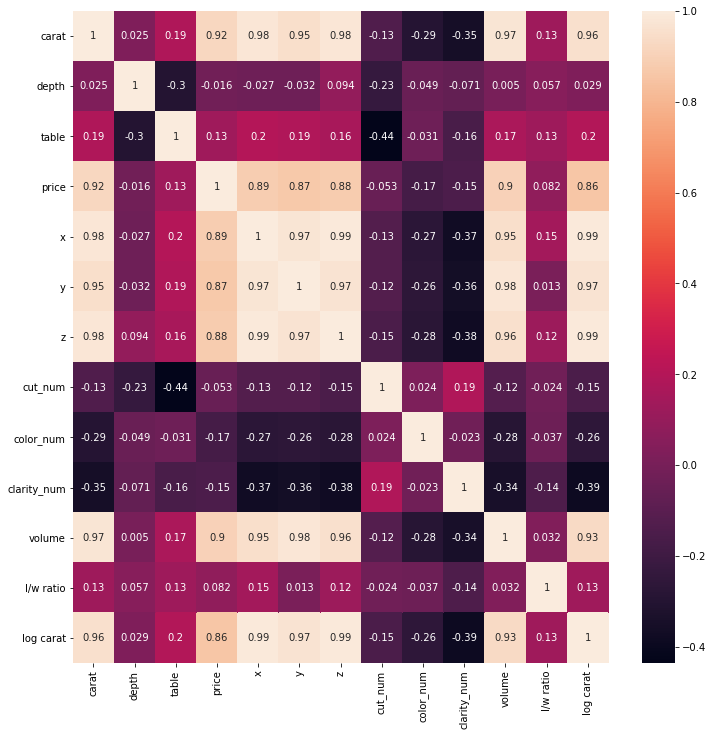

In [51]:
plt.figure(figsize=(12,12))
corr = diamonds_train.corr()
sns.heatmap(data=corr, annot=True, cbar=True)

In [20]:
def shape(df):
    shape=[]
    for i in df['table'].index:
        if 54<df['table'][i]>57 and 61<df['depth'][i]<62.5:
            shape.append('round')
        elif 52<df['table'][i]<60 and 60<df['depth'][i]<68:
            shape.append('oval')
        elif 63<df['table'][i]<69 and 69<df['depth'][i]<76:
            shape.append('princess')
        elif 58<df['table'][i]<63 and 58<df['depth'][i]<66:
            shape.append('cushion')
        else:
            shape.append('other')
    return shape
diamonds_train['shape'] = shape(diamonds_train)
diamonds_predict['shape'] = shape(diamonds_predict)

# ESCALAR

In [ ]:
#cat_features = ['cut', 'color', 'clarity']
features = ['carat', 'l/w ratio', 'volume', 'cut_num', 'color_num', 'clarity_num']
#predict_feat = ['id','carat', 'table', 'depth', 'x', 'y', 'z', 'cut_num', 'color_num', 'clarity_num']
target = 'price'

### TRAIN

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X = scaler.fit_transform(diamonds_train[features])
y = diamonds_train[target]

### TEST CSV (PREDICT)

In [ ]:
X_pred = scaler.fit_transform(diamonds_predict[features])

# TRAIN-TEST-SPLIT

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
#X = diamonds_train[features]
#y = diamonds_train[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### TEST

# MODELS

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

## 1. RANDOM FOREST

In [ ]:
rfr_model = RandomForestRegressor()

In [ ]:
rfr_model.fit(X_train, y_train)

In [ ]:
y_pred = rfr_model.predict(X_test)

In [ ]:
cv_score = cross_val_score(estimator=rfr_model, X=X_train, y=y_train, cv=5,verbose = 1)
print('Cross validation score : %.4f' % rfr_model.score(X_test, y_test))
print(cv_score)
mae = mean_absolute_error(y_test,y_pred)
print("mae: %f" %(mae))
r2 = rfr_model.score(X_test,y_pred)
print("R2: %f" %(r2))
mse = mean_squared_error(y_test,y_pred)
print("mse: %f" %(mse))
rmse = (mean_squared_error(y_test,y_pred))**0.5
print("rmse: %f" %(rmse))

In [ ]:
## Resultado con menor borrado de outliers
""" 

"""

In [ ]:
#crossval_score = cross_val_score(rfr_model, X_train, y_train, cv=10)
#print(cross_val_score)

## 2. DECISION TREE

In [ ]:
dtr_model = DecisionTreeRegressor(random_state = 0) #rstate=0 porque los resultados son mejores que sin poner nada o poniendo 1
dtr_model.fit(X_train, y_train)
y_pred = dtr_model.predict(X_test)

In [ ]:
cv_score = cross_val_score(estimator=dtr_model, X=X_train, y=y_train, cv=10,verbose = 1)
print('Cross validation score : %.4f' % dtr_model.score(X_test, y_test))
print(cv_score)
mae = mean_absolute_error(y_test,y_pred)
print("mae: %f" %(mae))
r2 = dtr_model.score(X_test,y_pred)
print("R2: %f" %(r2))
mse = mean_squared_error(y_test,y_pred)
print("mse: %f" %(mse))
rmse = (mean_squared_error(y_test,y_pred))**0.5
print("rmse: %f" %(rmse))


In [ ]:
"""
Cross validation score : 0.96
[0.96471869 0.96286045 0.96237324 0.96244763 0.96538262]
mae: 369.804442
R2: 1.000000
mse: 570145.458766
rmse: 755.079770
"""

mae = mean_absolute_error(y_test,y_pred)
print("mae: %f" %(mae))
r2 = rfr_model.score(X_test,y_test)
print("R2: %f" %(r2))
mse = mean_squared_error(y_test,y_pred)
print("mse: %f" %(mse))
rmse = (mean_squared_error(y_test,y_pred))**0.5
print("rmse: %f" %(rmse))

RESULTADOS SIN CAMBIAR RANDOM STATE:, con random state = 0, mejora
mae: 372.840853
R2: 0.980116
mse: 579384.121723
rmse: 761.172859

## 3. GRADIENT BOOSTING

In [ ]:
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=8, random_state=0, loss='ls',verbose = 1)
#max_depth 1, mal, 2, mal, 4 ok (553 rmse), 8 ok (542)

In [ ]:
gbr_model.fit(X_train , y_train)
y_pred = gbr_model.predict(X_test)

In [ ]:
cv_score = cross_val_score(estimator=gbr_model, X=X_train, y=y_train, cv=5,verbose = 1)
print('Cross validation score : %.4f' % gbr_model.score(X_test, y_test))
print(cv_score)
mae = mean_absolute_error(y_test, y_pred)
print("mae: %f" %(mae))
r2 = gbr_model.score(X_test,y_pred)
print("R2: %f" %(r2))
mse = mean_squared_error(y_test, y_pred)
print("mse: %f" %(mse))
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("rmse: %f" %(rmse))

In [ ]:
"""
Cross validation score : 0.9815
[0.98252068 0.98130918 0.98244676 0.97857692 0.98098148]
mae: 268.266150
R2: 1.000000
mse: 287796.842194
rmse: 536.467000
"""

## LIGHT GBM

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
hgbr_model = HistGradientBoostingRegressor()

In [ ]:
hgbr_model.fit(X_train, y_train)
y_pred = hgbr_model.predict(X_test)

In [ ]:
cv_score = cross_val_score(estimator=hgbr_model, X=X_train, y=y_train, cv=5,verbose = 1)
print('Cross validation score : %.4f' % hgbr_model.score(X_test, y_test))
print(cv_score)
mae = mean_absolute_error(y_test, y_pred)
print("mae: %f" %(mae))
r2 = hgbr_model.score(X_test,y_pred)
print("R2: %.4f" %(r2))
mse = mean_squared_error(y_test, y_pred)
print("mse: %f" %(mse))
rmse = (mean_squared_error(y_test, y_pred))**0.5
print("rmse: %f" %(rmse))

In [ ]:
Cross validation score : 0.9822
[0.98270454 0.98172722 0.98241903 0.97935203 0.9816655 ]
mae: 280.066804
R2: 1.0000
mse: 284251.192566
rmse: 533.152129

# ERROR METRICS

### MAE

In [ ]:
mae = mean_absolute_error(Y_test,y_pred)
print("mae: %f" %(mae))

### RMSE

In [ ]:
rmse = (mean_squared_error(Y_test,y_pred))**0.5
print("rmse: %f" %(rmse))

### R2

In [ ]:
Rsquare=regressor.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))

## PREDICTION

In [ ]:
X_predict = X_pred # diamonds_predict[features] if not scaled
predictions = hgbr_model.predict(X_predict)
diamonds_id = diamonds_predict['id']

# GENERAR DF

In [ ]:
submission = pd.DataFrame({'id': diamonds_id, 'price': predictions})

In [ ]:
submission.shape

In [ ]:
submission.info()

In [ ]:
submission.to_csv('submission.csv', index=False)